<a href="https://colab.research.google.com/github/sayan112207/Stock-Market-Prediction/blob/main/Invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=19e5e9df986e07d5771d07d9a2812db8d2a78ac469afb36f5ba7f109938c64ca
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [ ]:
file_path="/content/TATAMOTORS.NS(1).csv"
data = pd.read_csv(file_path)

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.738640,0.0
1,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.738640,0.0
2,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.199645,0.0
3,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.199645,0.0
4,1991-01-09,21.259020,21.259020,20.061329,20.510462,14.768451,0.0


In [ ]:
# Add indicators
data['RSI'] = ta.rsi(data['Close'], length=15)
data['EMAF'] = ta.ema(data['Close'], length=20)
data['EMAM'] = ta.ema(data['Close'], length=100)
data['EMAS'] = ta.ema(data['Close'], length=150)

# Create 'Target' variable
data['Target'] = data['Close'] - data['Open']
data['Target'] = data['Target'].shift(-1)

# Create 'TargetClass' based on 'Target'
data['TargetClass'] = [1 if data['Target'][i] > 0 else 0 for i in range(len(data))]

# Create 'TargetNextClose'
data['TargetNextClose'] = data['Close'].shift(-1)

# Drop rows with missing values and unnecessary columns
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Volume'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,index,Date,Open,High,Low,Close,Adj Close,RSI,EMAF,EMAM,EMAS
0,149,1991-07-31,30.840549,31.589106,30.391415,31.139973,22.422178,63.902852,29.696306,26.407259,24.557660
1,150,1991-08-01,31.289682,32.187950,31.289682,31.738817,22.853367,66.818234,29.890831,26.512834,24.652775
2,151,1991-08-02,32.337662,32.337662,31.439396,31.738817,22.853367,66.818234,30.066830,26.616319,24.746630
3,152,1991-08-05,31.139973,32.936508,30.840549,32.337662,23.284567,69.633649,30.283099,26.729613,24.847173
4,153,1991-08-06,32.337662,32.337662,32.337662,32.337662,23.284567,69.633649,30.478772,26.840664,24.946385
5,154,1991-08-07,33.535355,34.134201,32.786797,33.086220,23.823557,72.929561,30.727100,26.964338,25.054198
6,155,1991-08-08,32.637085,33.235931,31.439396,33.086220,23.823557,72.929561,30.951778,27.085563,25.160582
7,156,1991-08-09,33.086220,33.984489,33.086220,33.685066,24.254755,75.383304,31.212092,27.216247,25.273489
8,157,1991-08-12,34.134201,34.882755,33.535355,34.583336,24.901550,78.513392,31.533162,27.362129,25.396798
9,158,1991-08-13,35.781025,36.379871,35.631313,35.930737,25.871737,82.159203,31.951979,27.531805,25.536321


In [ ]:
print(data_set.shape)
print(type(data_set))

(8231, 11)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Save the 'Datetime' column before dropping it
datetimes = data['Date']

# Drop non-numeric columns for scaling
data_numeric = data.drop(['Date'], axis=1)  # Remove 'Datetime' column

# Scale the numeric data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_numeric)

# Convert the scaled data back to a DataFrame
data_set_scaled = pd.DataFrame(data_scaled, columns=data_numeric.columns)

# Add the 'Datetime' column back to the scaled dataset
data_set_scaled['Date'] = datetimes.values

# Print the scaled dataset
print(data_set_scaled)

         index      Open      High       Low     Close  Adj Close       RSI  \
0     0.000000  0.019418  0.018935  0.019305  0.019330   0.012959  0.663021   
1     0.000121  0.019860  0.019503  0.020200  0.019913   0.013378  0.699016   
2     0.000243  0.020891  0.019645  0.020350  0.019913   0.013378  0.699016   
3     0.000364  0.019712  0.020214  0.019753  0.020495   0.013796  0.733777   
4     0.000485  0.020891  0.019645  0.021245  0.020495   0.013796  0.733777   
...        ...       ...       ...       ...       ...        ...       ...   
8226  0.999515  0.933014  0.919163  0.942823  0.939788   0.939916  0.782610   
8227  0.999636  0.966778  0.933015  0.966152  0.949321   0.949429  0.802266   
8228  0.999757  1.000000  1.000000  0.991326  0.983074   0.983111  0.859298   
8229  0.999879  0.998031  0.966840  0.994965  0.978940   0.978985  0.835808   
8230  1.000000  0.998031  0.982352  1.000000  1.000000   1.000000  0.867230   

          EMAF      EMAM      EMAS    Target  Targe

In [ ]:
import numpy as np

# multiple feature from data provided to the model
X = []
backcandles = 30
num_columns = data_set_scaled.shape[1]  # get the number of columns

for j in range(num_columns):  # iterate over each column
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled.iloc[i-backcandles:i, j])  # use .iloc for integer-based indexing

# move axis from 0 to position 2
X = np.moveaxis(X, [0], [2])

# Erase first elements of y because of backcandles to match X length
X, yi = np.array(X), np.array(data_set_scaled.iloc[backcandles:, -1])
y = np.reshape(yi, (len(yi), 1))

In [ ]:
print(X.shape)

(8201, 30, 14)


In [ ]:
print(y.shape)

(8201, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

6560
(6560, 30, 14)
(1641, 30, 14)
(6560, 1)
(1641, 1)
[['1991-09-11']
 ['1991-09-12']
 ['1991-09-13']
 ...
 ['2017-07-14']
 ['2017-07-17']
 ['2017-07-18']]


In [ ]:
import pandas as pd

# Assuming 'y_train' is your target variable
y_train_timestamps = pd.to_datetime(y_train.ravel()).astype(int)  # Convert dates to timestamps

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

# Assuming data_set_scaled is a pandas DataFrame and 'datetime' is the column with the datetime values
data_set_scaled['Date'] = pd.to_datetime(data_set_scaled['Date'])
data_set_scaled['Date'] = data_set_scaled['Date'].view('int64')

# Convert your data to float32 before checking for NaN values
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Check for NaN values in your data
if np.isnan(X_train).any() or np.isnan(y_train).any():
    print("Your data contains NaN values. Please handle them before training the model.")

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

KeyError: 'Date'

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

NameError: name 'model' is not defined

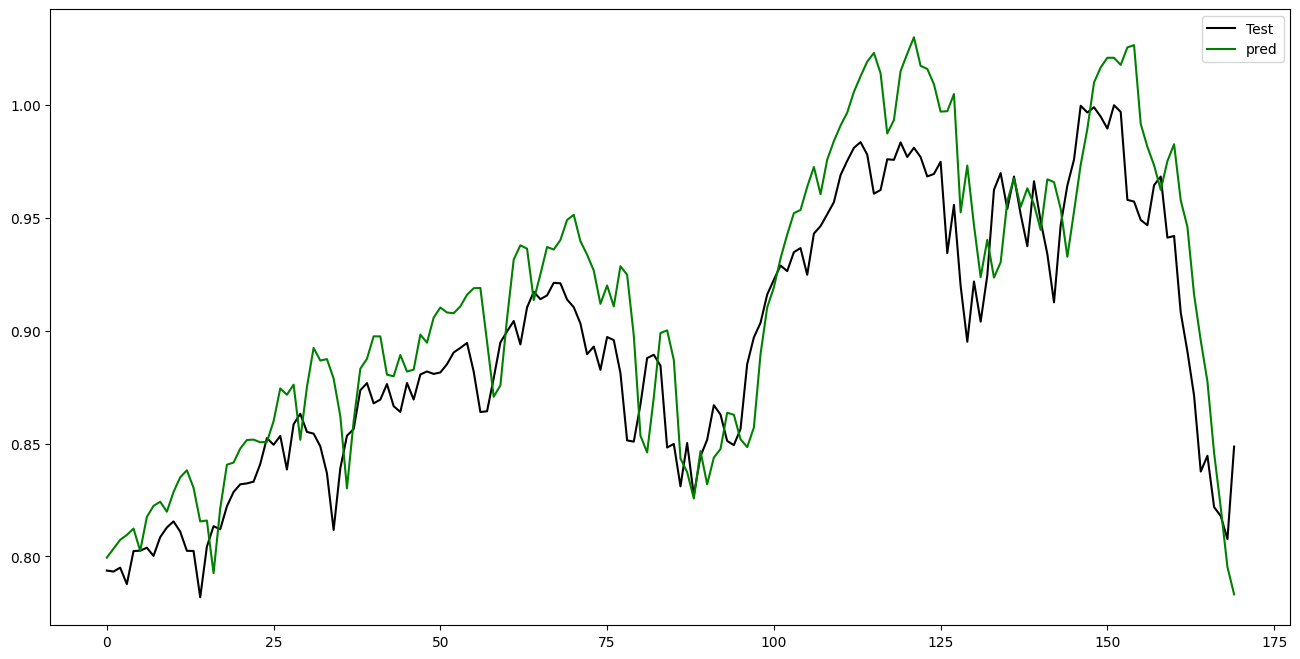

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
# Assuming y_pred is a continuous output; converting it into binary decisions
threshold = 0.0  # You might adjust this threshold based on your model's performance
y_pred_binary = [1 if pred > threshold else 0 for pred in y_pred]

# Calculate trading signals
data_test = data.iloc[-len(y_test):]  # Get the corresponding test data

# Assuming a starting capital of $10,000
initial_capital = 10000
capital = initial_capital
shares_held = 0
transaction_cost_rate = 0.0015  # 0.15% transaction cost
slippage = 0.02  # Assuming 2% slippage

for i in range(len(y_pred_binary)):
    if y_pred_binary[i] == 1 and i < len(y_pred_binary) - 1:
        # Buy signal: Assuming buying at the next day's open price
        shares_to_buy = (capital * (1 - transaction_cost_rate)) / (data_test.iloc[i + 1]['Open'] * (1 + slippage))
        capital -= shares_to_buy * data_test.iloc[i + 1]['Open']
        shares_held += shares_to_buy

    elif y_pred_binary[i] == 0 and i < len(y_pred_binary) - 1 and shares_held > 0:
        # Sell signal: Assuming selling at the next day's open price
        capital += shares_held * data_test.iloc[i + 1]['Open'] * (1 - transaction_cost_rate)
        shares_held = 0

# Calculate final portfolio value including shares held
final_portfolio_value = capital + shares_held * data_test.iloc[-1]['Adj Close']

# Calculate returns
returns = (final_portfolio_value - initial_capital) / initial_capital * 100

print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${final_portfolio_value}")
print(f"Returns: {returns:.2f}%")

Initial Capital: $10000
Final Portfolio Value: $10090.417714228712
Returns: 0.90%


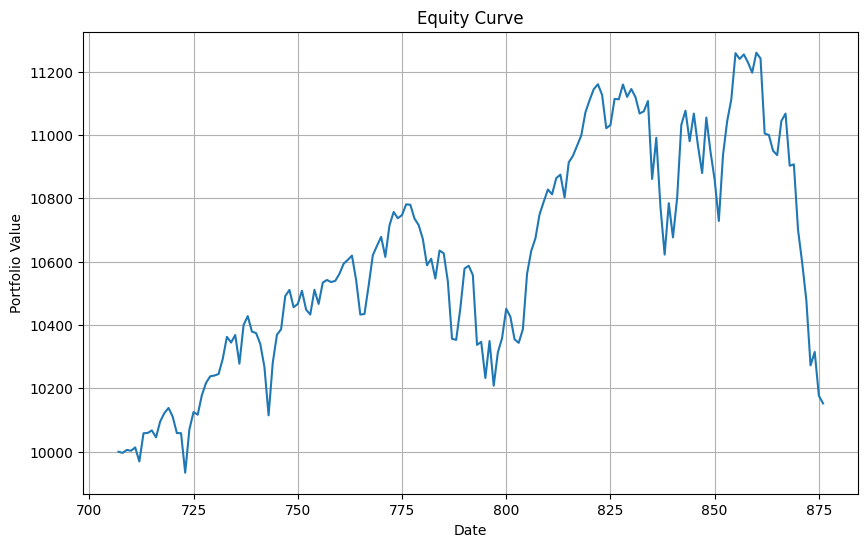

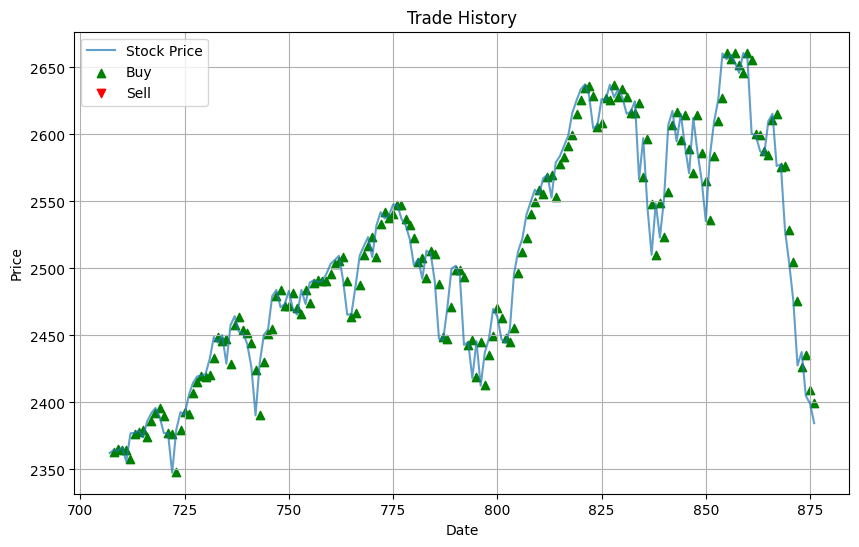

Initial Capital: $10000
Final Portfolio Value: $10152.54
Total Returns: 0.90%
Annualized Returns: 0.52%
Sharpe Ratio: 0.04
Maximum Drawdown: 0.12%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_pred is a continuous output; converting it into binary decisions
threshold = 0.5  # You might adjust this threshold based on your model's performance
y_pred_binary = [1 if pred > threshold else 0 for pred in y_pred]

# Calculate trading signals
data_test = data.iloc[-len(y_test):]  # Get the corresponding test data

# Assuming a starting capital of $10,000
initial_capital = 10000
capital = initial_capital
shares_held = 0
transaction_cost_rate = 0.0015  # 0.15% transaction cost
slippage = 0.02  # Assuming 2% slippage

equity_curve = [capital]  # List to store equity values over time
trade_history = []  # List to store trade history

for i in range(len(y_pred_binary)):
    if y_pred_binary[i] == 1 and i < len(y_pred_binary) - 1:
        # Buy signal: Assuming buying at the next day's open price
        shares_to_buy = (capital * (1 - transaction_cost_rate)) / (data_test.iloc[i + 1]['Open'] * (1 + slippage))
        capital -= shares_to_buy * data_test.iloc[i + 1]['Open']
        shares_held += shares_to_buy
        trade_history.append(('Buy', data_test.index[i + 1], data_test.iloc[i + 1]['Open']))

    elif y_pred_binary[i] == 0 and i < len(y_pred_binary) - 1 and shares_held > 0:
        # Sell signal: Assuming selling at the next day's open price
        capital += shares_held * data_test.iloc[i + 1]['Open'] * (1 - transaction_cost_rate)
        shares_held = 0
        trade_history.append(('Sell', data_test.index[i + 1], data_test.iloc[i + 1]['Open']))

    equity_curve.append(capital + shares_held * data_test.iloc[i]['Adj Close'])

# Calculate performance metrics
equity_curve = np.array(equity_curve)
returns = (equity_curve[-1] - initial_capital) / initial_capital * 100
daily_returns = np.diff(equity_curve) / equity_curve[1:] * 100
annualized_returns = ((1 + daily_returns.mean() / 100) ** 252 - 1) * 100
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
cumulative_returns = np.cumprod(1 + daily_returns / 100) - 1
drawdown = (np.maximum.accumulate(cumulative_returns) - cumulative_returns).max()

# Remove the last element from the equity curve to match the length of data_test.index
equity_curve = equity_curve[:-1]

# Visualizations
# Equity Curve
plt.figure(figsize=(10, 6))
plt.plot(data_test.index[:len(equity_curve)], equity_curve)
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()

# Trade History
df_trade_history = pd.DataFrame(trade_history, columns=['Action', 'Date', 'Price'])
plt.figure(figsize=(10, 6))
plt.plot(data_test.index, data_test['Adj Close'], label='Stock Price', alpha=0.7)
plt.scatter(df_trade_history[df_trade_history['Action'] == 'Buy']['Date'],
            df_trade_history[df_trade_history['Action'] == 'Buy']['Price'],
            color='green', label='Buy', marker='^')
plt.scatter(df_trade_history[df_trade_history['Action'] == 'Sell']['Date'],
            df_trade_history[df_trade_history['Action'] == 'Sell']['Price'],
            color='red', label='Sell', marker='v')
plt.title('Trade History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Display performance metrics
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${equity_curve[-1]:.2f}")
print(f"Total Returns: {returns:.2f}%")
print(f"Annualized Returns: {annualized_returns:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {drawdown:.2f}%")

In [ ]:
# Define Risk Management Parameters
stop_loss_ratio = 0.03  # 3% maximum loss per trade
risk_reward_ratio = 2   # 2:1 risk-reward ratio

# Define equity_curve as a Python list to use the append method
equity_curve = [capital]  # List to store equity values over time
trade_history = []  # List to store trade history

# Calculate Stop Loss and Take Profit Levels
for i in range(len(y_pred_binary)):
    if y_pred_binary[i] == 1 and i < len(y_pred_binary) - 1:
        # Buy signal: Assuming buying at the next day's open price
        entry_price = data_test.iloc[i + 1]['Open']
        stop_loss = entry_price * (1 - stop_loss_ratio)
        take_profit = entry_price * (1 + stop_loss_ratio * risk_reward_ratio)

        shares_to_buy = (capital * (1 - transaction_cost_rate)) / (entry_price * (1 + slippage))
        capital -= shares_to_buy * entry_price
        shares_held += shares_to_buy

        trade_history.append(('Buy', data_test.index[i + 1], entry_price, stop_loss, take_profit))

    elif y_pred_binary[i] == 0 and i < len(y_pred_binary) - 1 and shares_held > 0:
        # Sell signal: Assuming selling at the next day's open price
        exit_price = data_test.iloc[i + 1]['Open']
        capital += shares_held * exit_price * (1 - transaction_cost_rate)
        shares_held = 0

        # Record trade history and check for stop loss or take profit
        if exit_price <= stop_loss or exit_price >= take_profit:
            trade_status = 'SL' if exit_price <= stop_loss else 'TP'
            trade_history.append(('Sell', data_test.index[i + 1], exit_price, trade_status))
        else:
            trade_history.append(('Sell', data_test.index[i + 1], exit_price, 'No action'))

        equity_curve.append(capital + shares_held * data_test.iloc[i]['Adj Close'])


In [ ]:
# Calculate performance metrics if equity_curve is not empty and has more than one element
if len(equity_curve) > 1:
    equity_curve = np.array(equity_curve)
    returns = (equity_curve[-1] - initial_capital) / initial_capital * 100
    daily_returns = np.diff(equity_curve) / equity_curve[:-1] * 100
    annualized_returns = ((1 + daily_returns.mean() / 100) ** 252 - 1) * 100
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
    cumulative_returns = np.cumprod(1 + daily_returns / 100) - 1
    drawdown = (np.maximum.accumulate(cumulative_returns) - cumulative_returns).max()
else:
    print("Insufficient data to calculate performance metrics. Check if trades were executed.")

Insufficient data to calculate performance metrics. Check if trades were executed.
